In [74]:
import pandas as pd

In [75]:
# Import patients file
patients_file = "https://github.com/spiros/nkua-health-data-science/raw/master/data/dest/patients.csv.gz"
df_patients = pd.read_csv(patients_file)

In [76]:
# Display number of rows and values in loaded file
df_patients.shape

(1162, 25)

In [77]:
# Display the first three rows of the dataframe
df_patients.head(3)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17,NaN,999-65-3251,NaN,NaN,NaN,Damon455,Langosh790,NaN,...,Middleborough Massachusetts US,620 Lynch Tunnel Apt 0,Springfield,Massachusetts,Hampden County,1104.0,42.080389,-72.480431,9039.1645,7964.1255
1,339144f8-50e1-633e-a013-f361391c4cff,1998-05-11,NaN,999-10-8743,S99996708,X75063318X,Mr.,Chi716,Greenfelder433,NaN,...,Athens Athens Prefecture GR,1060 Bernhard Crossroad Suite 15,Boston,Massachusetts,Suffolk County,2131.0,42.292557,-71.061160,571935.8725,787.5375
2,d488232e-bf14-4bed-08c0-a82f34b6a197,2003-01-28,1999-01-01,999-56-6057,S99929424,NaN,Ms.,Phillis443,Walter473,NaN,...,Boston Massachusetts US,677 Ritchie Terrace,Hingham,Massachusetts,Plymouth County,2043.0,42.200491,-70.916076,582557.8030,104782.2070


In [78]:
# Drop columns that are not required
c_to_drop = [
    'SSN',
    'DRIVERS',
    'PASSPORT',
    'PREFIX',
    'FIRST',
    'LAST',
    'SUFFIX',
    'MAIDEN',
    'MARITAL',
    'BIRTHPLACE',
    'ADDRESS',
    'CITY',
    'STATE',
    'COUNTY',
    'ZIP',
    'LAT',
    'LON',
    'HEALTHCARE_EXPENSES',
    'HEALTHCARE_COVERAGE'
]

df_patients.drop(columns=c_to_drop, inplace=True)

In [79]:
# Display the first three rows of the dataframe
df_patients.head(3)

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER
0,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17,NaN,white,nonhispanic,M
1,339144f8-50e1-633e-a013-f361391c4cff,1998-05-11,NaN,white,nonhispanic,M
2,d488232e-bf14-4bed-08c0-a82f34b6a197,2003-01-28,1999-01-01,white,nonhispanic,F


In [80]:
# Display data types
df_patients.dtypes

Id           object
BIRTHDATE    object
DEATHDATE    object
RACE         object
ETHNICITY    object
GENDER       object
dtype: object

In [82]:
# The date of birth and the date of death should be a datetime
# Convert the BIRTHDATE column to a datetime column. If you try to convert the 
# column directly, an error will occur as some values are not valid dates.
# Adding the "errors=coerce" will convert any invalid dates e.g. malformed, strings, numbers etc
# into missing values
df_patients['BIRTHDATE'] = pd.to_datetime(
    df_patients['BIRTHDATE'],
    errors='coerce'
)

df_patients['DEATHDATE'] = pd.to_datetime(
    df_patients['DEATHDATE'],
    errors='coerce'
)

df_patients.dtypes

Id                   object
BIRTHDATE    datetime64[ns]
DEATHDATE    datetime64[ns]
RACE                 object
ETHNICITY            object
GENDER               object
dtype: object

In [83]:
# Number of unique patients
df_patients.Id.nunique()

1162

In [84]:
# Rows where the patient id is missing
df_patients[df_patients['Id'].isna()]

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER


In [85]:
# Create a flag for patient exclusion called 'exclude' and set default value to 0
df_patients['exclude'] = 0

In [86]:
# Count unique values for GENDER
df_patients.GENDER.value_counts(dropna=False)

GENDER
F         600
M         538
NaN        20
8293.3      4
Name: count, dtype: int64

In [87]:
# Exclude patients with invalid or missing gender
valid_genders = ['F', 'M']
m = (df_patients.GENDER.isna())|(~df_patients.GENDER.isin(valid_genders))
df_patients.loc[m, 'exclude'] = 1

In [88]:
# Count unique values for ETHNICITY
df_patients.ETHNICITY.value_counts(dropna=False)

ETHNICITY
nonhispanic    1057
hispanic        105
Name: count, dtype: int64

In [89]:
# Count unique values for RACE
df_patients.RACE.value_counts(dropna=False)

RACE
white       944
black        96
asian        72
hawaiian     16
XJniDSe      15
other        11
???-          6
native        2
Name: count, dtype: int64

In [90]:
# Exclude patients with invalid RACE values
valid_race = ['white', 'black', 'asian', 'hawaiian', 'other', 'native']
m = (df_patients.RACE.isna())|(~df_patients.RACE.isin(valid_race))
df_patients.loc[m, 'exclude'] = 1

In [93]:
# Display and exclude patients with an invalid date of birth
# Date of birth is missing
m = (df_patients.BIRTHDATE.isna())
df_patients.loc[m, 'exclude'] = 1
df_patients[df_patients.BIRTHDATE.isna()]

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,exclude
326,8a69ae35-07ad-e093-0162-ad02d8e1e070,NaT,NaT,white,nonhispanic,M,1
457,0a168e32-7b62-8597-0e11-296871bb764f,NaT,NaT,black,nonhispanic,M,1
573,3b7ccd6e-f331-abc9-a498-a16280c3ee10,NaT,NaT,white,nonhispanic,F,1
874,42daa5f0-9beb-4d16-322b-9df14bbe418b,NaT,1992-01-06,white,nonhispanic,F,1


In [96]:
# Find and exclude patients were the date of birth is after the date of death
m = df_patients['BIRTHDATE']>df_patients['DEATHDATE']
df_patients.loc[m, 'exclude'] = 1 
df_patients[df_patients['BIRTHDATE']>df_patients['DEATHDATE']]

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,exclude
2,d488232e-bf14-4bed-08c0-a82f34b6a197,2003-01-28,1999-01-01,white,nonhispanic,F,1
229,965ecf4b-40d6-02e3-fe08-acd9eafc68fe,2034-01-01,2002-12-06,white,nonhispanic,M,1
661,e0b4bd84-4df2-d30c-cd67-a9daee769602,2034-01-01,2005-03-17,white,nonhispanic,M,1
777,4fadd99c-4f13-0c0f-2b37-2c3c9c13ff78,2034-01-01,1966-05-07,white,nonhispanic,M,1
781,71feb043-65a2-618f-8a43-77990c308b76,2034-01-01,2013-12-13,white,nonhispanic,F,1
1049,79e131ae-ef35-fe33-f806-df3c5ed41b11,2034-01-01,1994-04-22,white,nonhispanic,F,1


<AxesSubplot:ylabel='Frequency'>

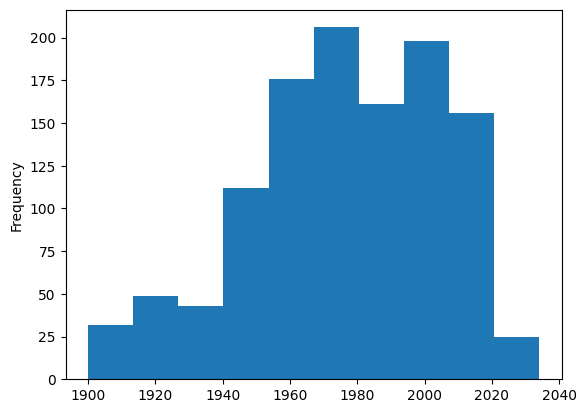

In [97]:
# Find and exclude patients with a year of birth before 1910 
# or after 2021
df_patients.BIRTHDATE.dt.year.plot(kind='hist')

In [98]:
m = (df_patients.BIRTHDATE.dt.year < 1910)|(df_patients.BIRTHDATE.dt.year > 2021)
print(df_patients.loc[m].shape)
df_patients.loc[m, 'exclude'] = 1

(19, 7)


In [99]:
df_patients[df_patients['exclude']==0].BIRTHDATE.min()

Timestamp('1911-07-14 00:00:00')

In [100]:
df_patients[df_patients['exclude']==1].BIRTHDATE.min()

Timestamp('1900-01-01 00:00:00')

In [101]:
df_patients.exclude.value_counts()

exclude
0    1093
1      69
Name: count, dtype: int64

In [102]:
df_patients.dtypes

Id                   object
BIRTHDATE    datetime64[ns]
DEATHDATE    datetime64[ns]
RACE                 object
ETHNICITY            object
GENDER               object
exclude               int64
dtype: object